Iter: 0, OR MSE: 0.3750000
Iter: 20, OR MSE: 0.2500000
Iter: 40, OR MSE: 0.1250000
Iter: 60, OR MSE: 0.0000000
Iter: 80, OR MSE: 0.0000000
Iter: 0, XOR no hidden MSE: 0.2500000
Iter: 20, XOR no hidden MSE: 0.2500000
Iter: 40, XOR no hidden MSE: 0.2500000
Iter: 60, XOR no hidden MSE: 0.2500000
Iter: 80, XOR no hidden MSE: 0.2500000
Iter: 0, XOR bias momentum MSE: 0.1269178
Iter: 50, XOR bias momentum MSE: 0.1250502
Iter: 100, XOR bias momentum MSE: 0.1249946
Iter: 150, XOR bias momentum MSE: 0.1249928
Iter: 200, XOR bias momentum MSE: 0.1249926
Iter: 250, XOR bias momentum MSE: 0.1249925
Iter: 300, XOR bias momentum MSE: 0.1249924
Iter: 350, XOR bias momentum MSE: 0.1249922
Iter: 400, XOR bias momentum MSE: 0.1249921
Iter: 450, XOR bias momentum MSE: 0.1249919
Iter: 500, XOR bias momentum MSE: 0.1249918
Iter: 550, XOR bias momentum MSE: 0.1249916
Iter: 600, XOR bias momentum MSE: 0.1249915
Iter: 650, XOR bias momentum MSE: 0.1249913
Iter: 700, XOR bias momentum MSE: 0.1249912
Iter: 750,

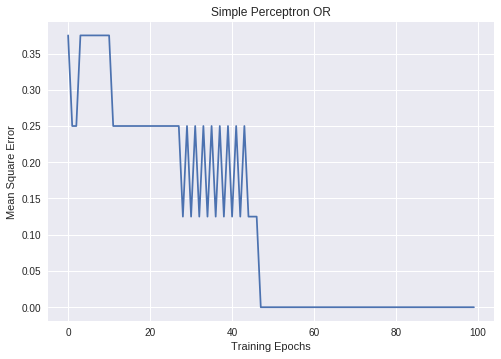

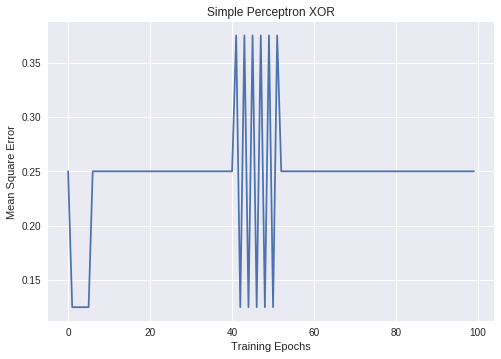

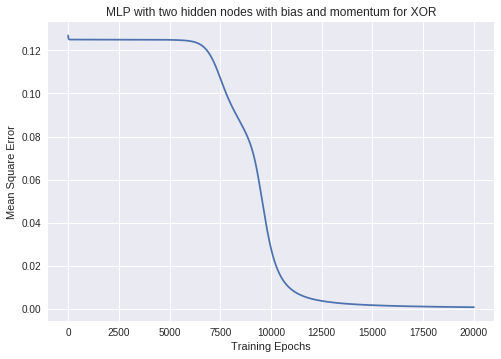

In [3]:
"""
OR_and_XOR.oy

Backpropagation tutorial using a basic perceptron and MLP, without
the aid of additional NN libraries. It does use Numpy for faster
matrix operations and Matplotlib for plotting.

Three programs are executed is sequence 
one_layer_OR() - has only an output layer but succeeds for the OR function
one_layer_XOR() - has only an output layer and fails to develop an XOR model
multi_layer_with_bias_with_momentum_XOR() - has a hiddel layer, so succeeds

matplotlib is used to plot the training error per epoch
"""
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


def one_layer_OR():
    """
    Tutorial of a basic one layer NN learning the OR function
    """
    # Each tuple in form (bias, x, y)
    data_in = np.array([(1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)])
    data_in = data_in.T

    # attempting to learn the OR function
    target = np.array([0, 1, 1, 1])

    # Input and output dimension
    size_in = data_in.shape[0]
    size_out = target.ndim

    random_seed = 2
    np.random.seed(random_seed)

    #initial weights of the network
    weight_out = np.random.rand(size_out, size_in) - 0.5

    learning_rate = 0.01
    num_epochs = 100

    error_log = np.zeros(num_epochs)

    for i in range(0, num_epochs):
        predicted = np.dot(weight_out, data_in) > 0
        weight_out = weight_out + learning_rate * np.dot((target - predicted), data_in.T)
        error_log[i] = 0.5 * ((target - predicted) ** 2).mean(axis=None)
        if (i % 20) == 0:
            print("Iter: %d, OR MSE: %8.7f" % (i, error_log[i]))

    plt.figure(1)
    plt.xlabel('Training Epochs')
    plt.ylabel('Mean Square Error')
    plt.title('Simple Perceptron OR')
    plt.plot(error_log)
    plt.draw()

def one_layer_XOR():
    """
    Tutorial of a basic NN learning the XOR function
    """
    # Each tuple in form (bias, x, y)
    data_in = np.array([(1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)])
    data_in = data_in.T

    # Attempting to learning the XOR function
    target = np.array([0, 1, 1, 0])

    # Input and output dimension
    size_in = data_in.shape[0]
    size_out = target.ndim

    random_seed = 2
    np.random.seed(random_seed)

    #initial weights of the network
    weight_out = np.random.rand(size_out, size_in) - 0.5

    learning_rate = 0.01
    num_epochs = 100

    error_log = np.zeros(num_epochs)

    for i in range(0, num_epochs):
        predicted = np.dot(weight_out, data_in) > 0
        weight_out = weight_out + learning_rate * np.dot((target - predicted), data_in.T)
        error_log[i] = 0.5 * ((target - predicted) ** 2).mean(axis=None)
        if (i % 20) == 0:
            print("Iter: %d, XOR no hidden MSE: %8.7f" % (i, error_log[i]))

    plt.figure(2)
    plt.xlabel('Training Epochs')
    plt.ylabel('Mean Square Error')
    plt.title('Simple Perceptron XOR')
    plt.plot(error_log)
    plt.draw()

def multi_layer_with_bias_with_momentum_XOR():
    """
    Tutorial for a basic multi-layer NN with bias or momentum
    """
    # In the form bias (always 1), x1 row, x2 row
    data_in = np.array([(1, 1, 1, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
    target = np.array([0, 1, 1, 0])

    size_in = 2
    size_hidden = 2  # Can be anything - larger will take longer
    size_out = target.ndim

    random_seed = 2
    np.random.seed(random_seed)

    #initial weights of the network
    weight_out = np.random.rand(size_out, size_hidden + 1) - 0.5
    weight_hidden = np.random.rand(size_hidden, size_in + 1) - 0.5

    weight_hidden_prev = np.zeros(weight_hidden.shape)
    weight_out_prev = np.zeros(weight_out.shape)

    learning_rate = 0.1
    momemtum = 0.0
    num_epochs = 20000

    error_log = np.zeros([num_epochs])

    for i in range(0, num_epochs):

        # Computing predicted output for the hidden layer, then adding bias
        predicted_h = 1 / (1 + np.exp(np.dot(-weight_hidden, data_in)))
        predicted_h = np.concatenate((np.ones([1, data_in.shape[1]]), predicted_h), axis=0)

        # computing output of network
        predicted_out = 1 / (1 + np.exp(np.dot(-weight_out, predicted_h)))

        # computing the derivatives for the weight updates
        deriv_out = (predicted_out * (1 - predicted_out)) * (target - predicted_out)
        deriv_h = (predicted_h * (1 - predicted_h)) * (weight_out.T * deriv_out)

        deriv_weight_h = learning_rate * np.dot(
            data_in, deriv_h[1:].T).T + momemtum * weight_hidden_prev
        weight_hidden = weight_hidden + deriv_weight_h
        weight_hidden_prev = deriv_weight_h

        deriv_weight_out = learning_rate * np.dot(
            predicted_h, deriv_out.T).T + momemtum * weight_out_prev
        weight_out = weight_out + deriv_weight_out
        weight_out_prev = deriv_weight_out

        predicted_out_err = 1 / (1 + np.exp(np.dot(-weight_out, np.concatenate(
            (np.ones([1, 4]), (1 / (1 + np.exp(np.dot(-weight_hidden, data_in)))))))))
        error_log[i] = 0.5 * ((predicted_out_err - target) ** 2).mean(axis=None)
        if (i % 50) == 0:
#            print('XOR bias momentum MSE: {0}'.format(error_log[i]))
            print("Iter: %d, XOR bias momentum MSE: %8.7f" % (i, error_log[i]))

    plt.figure(4)
    plt.xlabel('Training Epochs')
    plt.ylabel('Mean Square Error')
    plt.title('MLP with two hidden nodes with bias and momentum for XOR')
    plt.plot(error_log)
    plt.draw()

if __name__ == '__main__':
    one_layer_OR()
    one_layer_XOR()
    multi_layer_with_bias_with_momentum_XOR()

plt.show()  # keeping the plots alive until you close them